In [1]:
# --------------------- EDA Rooftop Solar Potential of Nairobi ----------------------

In [2]:
# --------------------- import necessary library ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# --------------------- Load datasets ----------------------
df = pd.read_csv("../original_datasets/nairobi_rooftop_solar_potential.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Shape: (272751, 12)
Columns: ['uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price', 'Comment']


C:\Users\svrat\AppData\Local\Temp\ipykernel_19552\3625543568.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../original_datasets/nairobi_rooftop_solar_potential.csv")


In [4]:
df.isna().sum()

uuid                               0
City                               0
Surface_area                       0
Potential_installable_area         0
Peak_installable_capacity          0
Energy_potential_per_year          0
Assumed_building_type              0
Estimated_tilt                     0
Estimated_building_height         30
Estimated_capacity_factor       3502
Unit_installation_price       272751
Comment                       272749
dtype: int64

In [7]:
#--------------------- Drop Unecessary columns --------------------------
df.drop(['uuid', 'Comment','Unit_installation_price'] , axis=1, inplace=True)

In [8]:
# --------------------- columns after drop  ----------------------
print("Columns:", df.columns.tolist())
print(df.shape)

Columns: ['City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']
(272751, 9)


In [9]:
# ------------------ Missing value ----------------------
df.isna().sum()


City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height       30
Estimated_capacity_factor     3502
dtype: int64

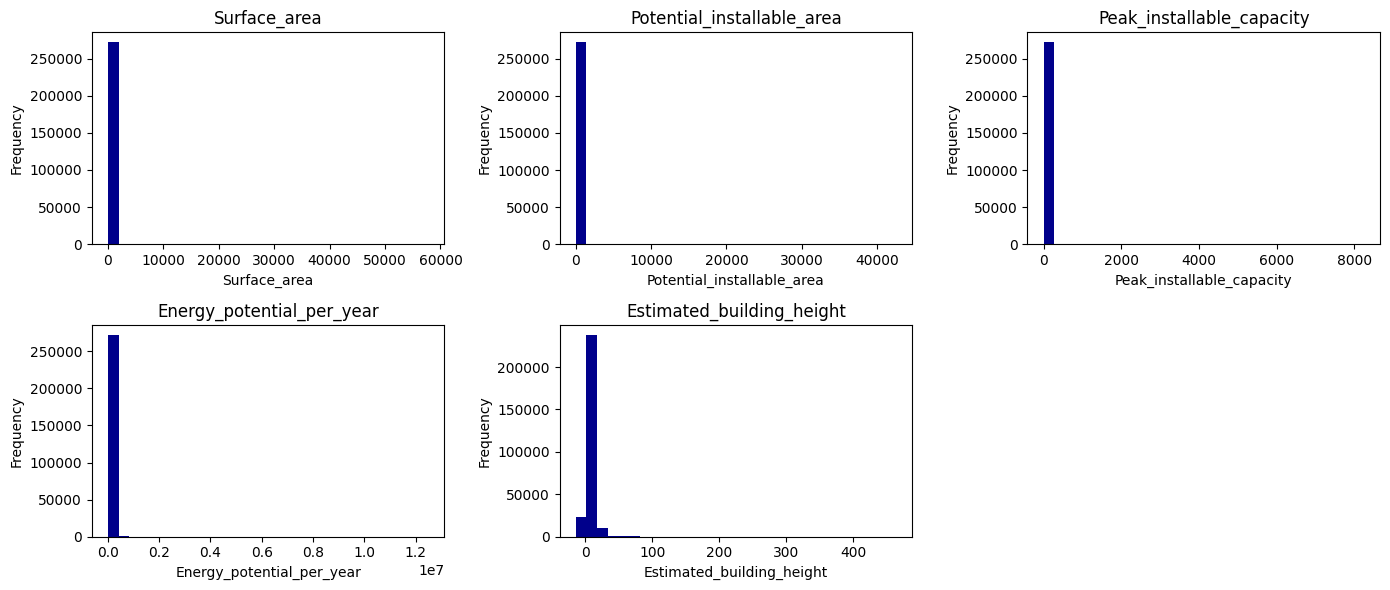

In [10]:
#-------------------- Distribution of necessary columns -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='hist', bins=30, color='darkblue', title=col)
    axes[i].set_xlabel(col)
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

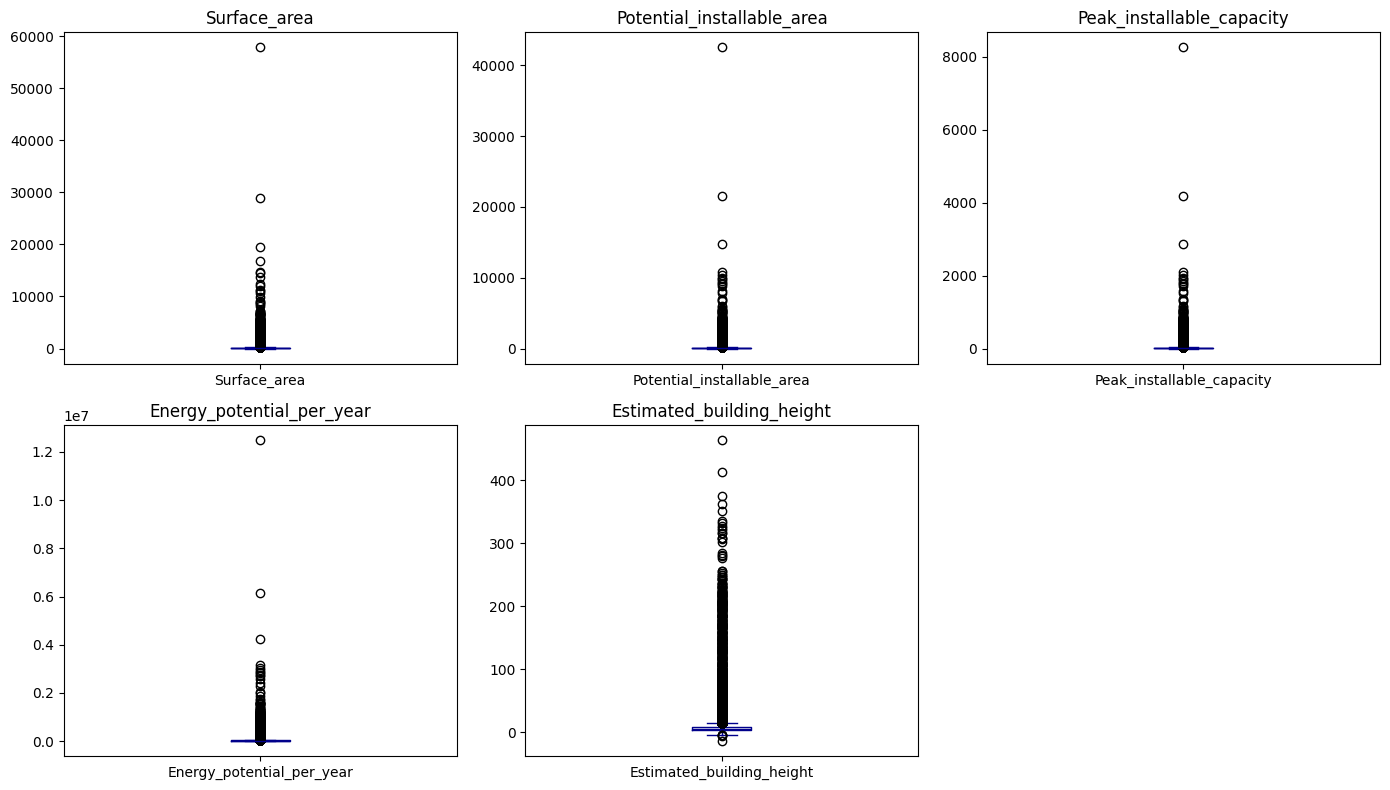

In [11]:
#-------------------- Boxplot of necessary columns to see outliers -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='box', color='darkblue', title=col)
 
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
(df == 0).sum()
#This means that eventhough there is surface_area but the potential installable area is 0. Then the surface couldn't be installed.

City                             0
Surface_area                    10
Potential_installable_area    3502
Peak_installable_capacity     3502
Energy_potential_per_year     3502
Assumed_building_type            0
Estimated_tilt                1413
Estimated_building_height     2383
Estimated_capacity_factor        0
dtype: int64

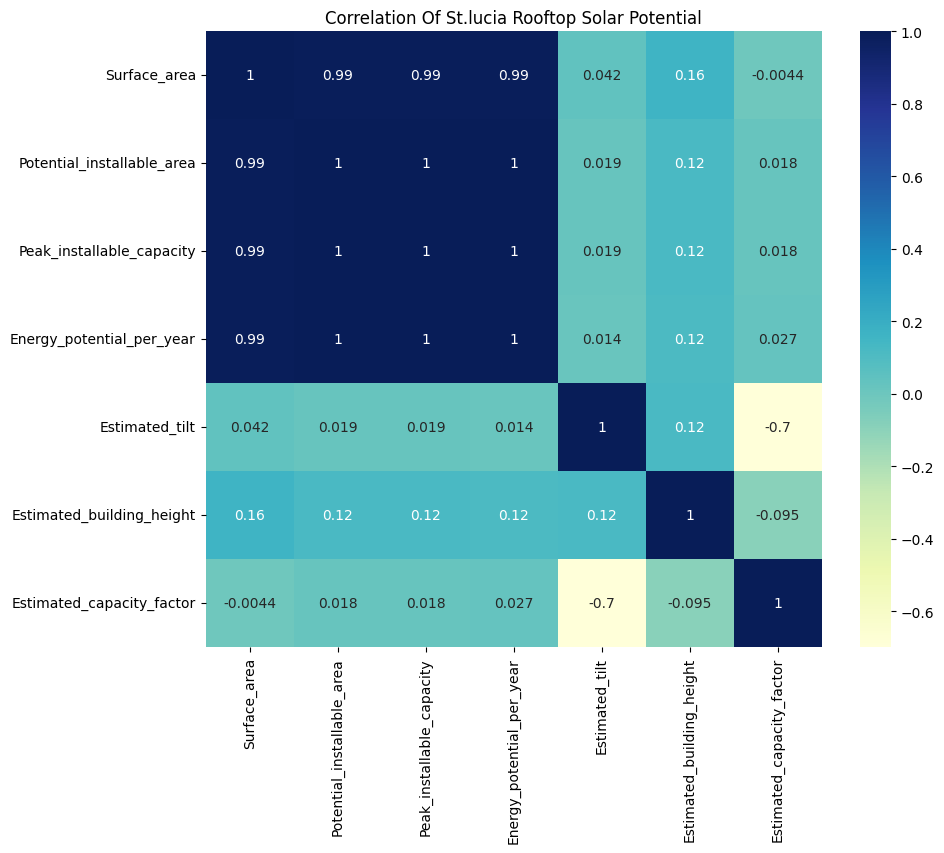

In [13]:
# --------------------- Correlation Heatmap of all the columns that contains zero----------------------
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()

In [14]:
#Let's see why the value of Peak_installable_capacity and Energy_potential_per_year has correlation 1
df[df['Peak_installable_capacity'] == df['Energy_potential_per_year']]

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
180,Nairobi,12.31,0.0,0.0,0.0,industrial,29.59,17.45,NaN
498,Nairobi,51.56,0.0,0.0,0.0,public,30.25,10.05,NaN
536,Nairobi,18.92,0.0,0.0,0.0,single family residential,32.21,10.46,NaN
658,Nairobi,28.00,0.0,0.0,0.0,single family residential,23.80,4.81,NaN
769,Nairobi,17.03,0.0,0.0,0.0,single family residential,4.17,2.81,NaN
...,...,...,...,...,...,...,...,...,...
272377,Nairobi,12.71,0.0,0.0,0.0,single family residential,6.47,2.30,NaN
272487,Nairobi,26.04,0.0,0.0,0.0,single family residential,10.10,3.10,NaN
272518,Nairobi,40.12,0.0,0.0,0.0,multi-family residential,30.12,16.87,NaN
272614,Nairobi,21.69,0.0,0.0,0.0,multi-family residential,4.50,7.52,NaN


In [16]:

df = df.loc[(df != 0).all(axis=1)]

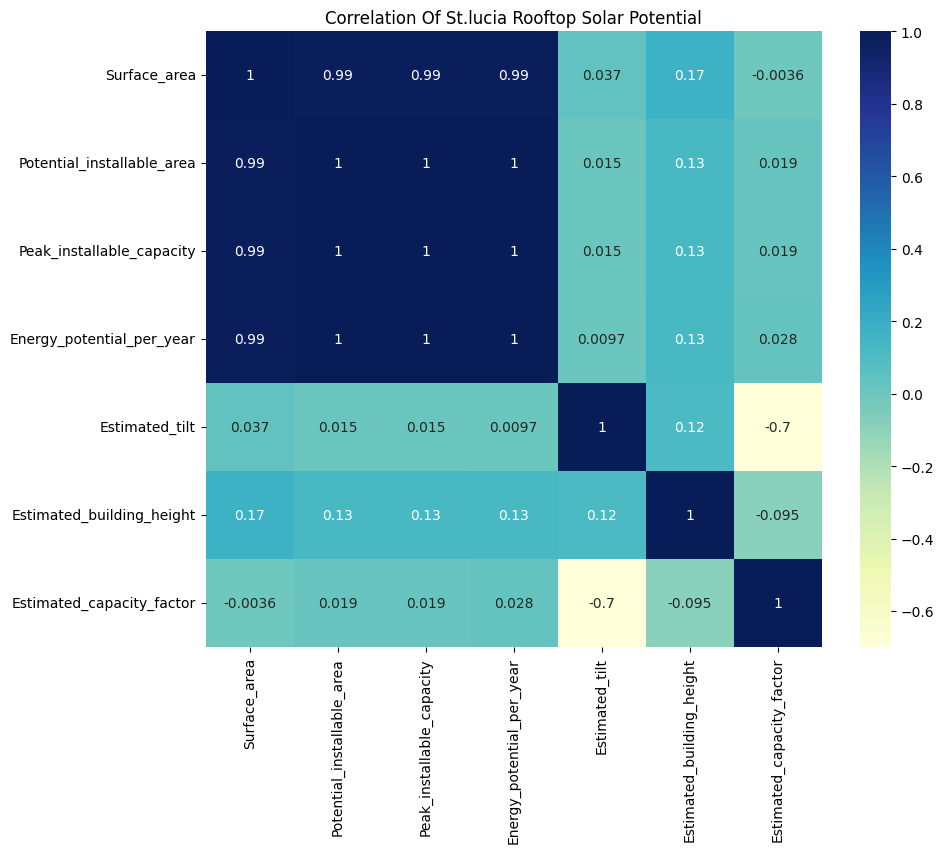

In [17]:
# --------------------- Correlation Heatmap of all the columns remove all the zero----------------------
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()